In [12]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [13]:
#  Load Dataset
file_path = "../Data/Electric_Vehicle_Sales.csv"
df = pd.read_csv(file_path)

In [14]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [4]:
df.shape

(96845, 8)

In [5]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [16]:
# Convert 'Date' to Datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#  Extract Features from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop Unnecessary Columns
df.drop(columns=['Date', 'Month_Name'], inplace=True)

#  Encode Categorical Variables
categorical_cols = ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle Missing Values
df.fillna(df.mode().iloc[0], inplace=True)

Exploratory Data Analysis (EDA)

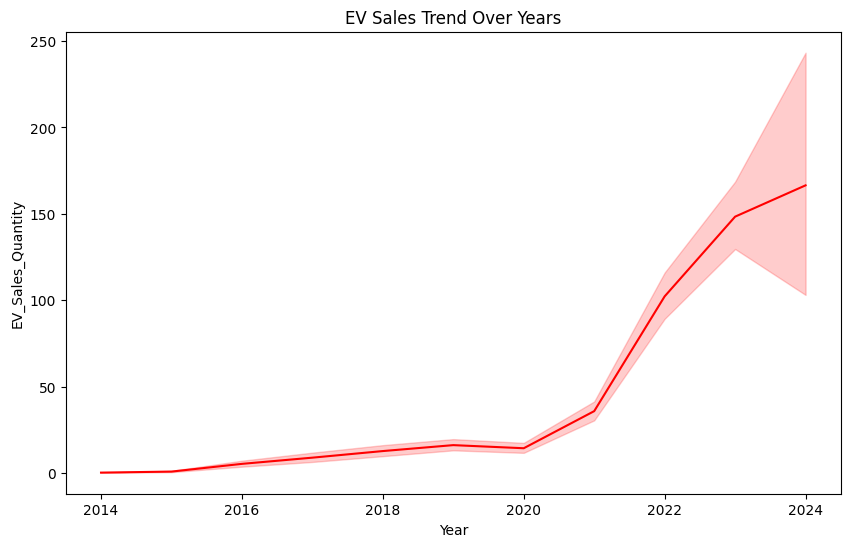

In [17]:
# EV Sales Trend Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity',color='red')
plt.title('EV Sales Trend Over Years')
plt.show()

In [18]:
#  Extract State Columns(because there are individual columns for states)
state_columns = [col for col in df.columns if col.startswith("State_")]

#  Sum EV sales per state
state_sales = df[state_columns].multiply(df["EV_Sales_Quantity"], axis=0).sum()

#  Convert to DataFrame
state_sales_df = state_sales.reset_index()
state_sales_df.columns = ["State", "Total EV Sales"]

#  Clean State Names (Remove "State_" Prefix)
state_sales_df["State"] = state_sales_df["State"].str.replace("State_", "")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10012\4249737594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales_df.sort_values(by="Total EV Sales", ascending=False),


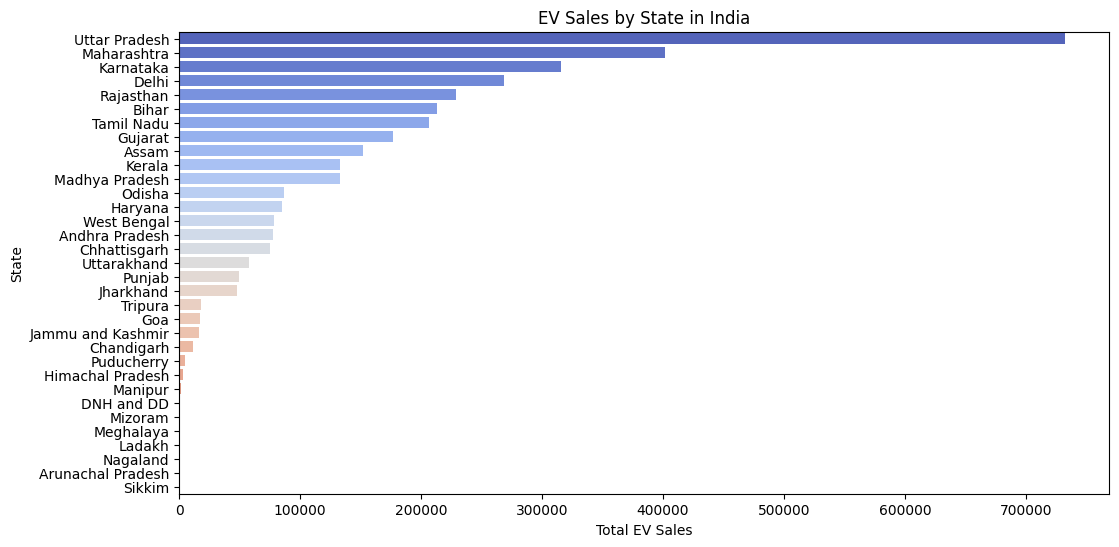

In [19]:
#Bar Chart: EV Sales by State**
plt.figure(figsize=(12, 6))
sns.barplot(data=state_sales_df.sort_values(by="Total EV Sales", ascending=False), 
            x="Total EV Sales", y="State", palette="coolwarm")
plt.title("EV Sales by State in India")
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10012\2894763357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x="Total EV Sales", y="State", palette="Blues_r")


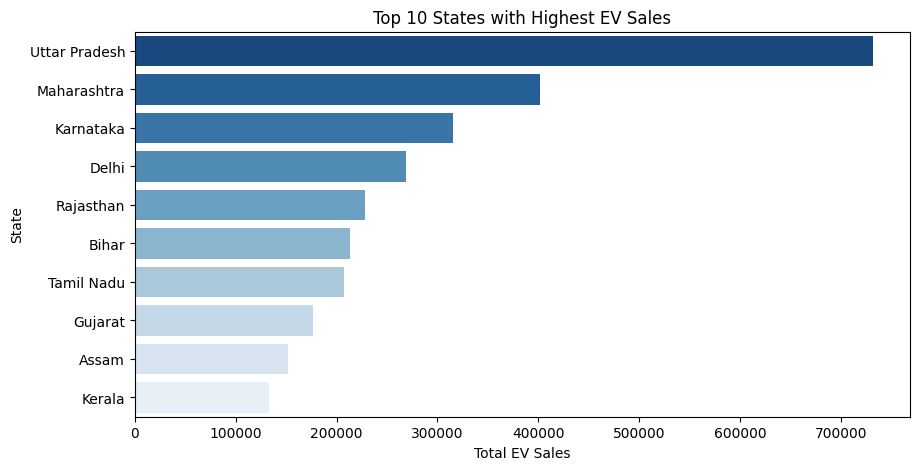

In [20]:
# Top 10 States with Highest Sales**
top_states = state_sales_df.sort_values(by="Total EV Sales", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_states, x="Total EV Sales", y="State", palette="Blues_r")
plt.title("Top 10 States with Highest EV Sales")
plt.show()

Linear Regression Model

🔹 Linear Regression RMSE: 484.10269421215094


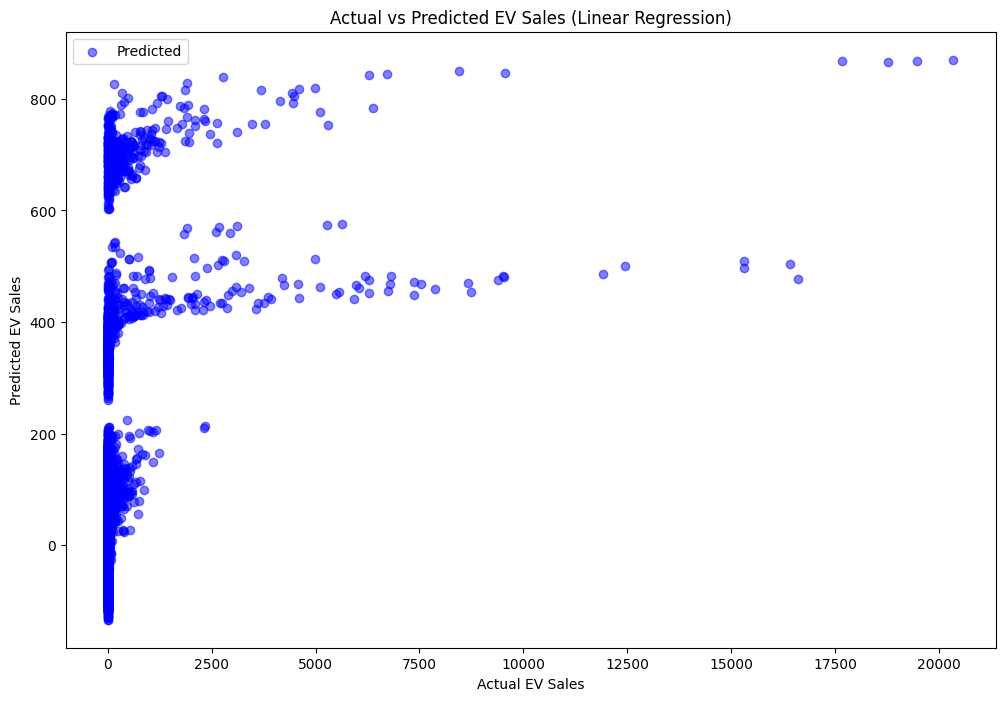

In [22]:
# Split Data for Model Training
X = df.drop(columns=['EV_Sales_Quantity'])
y = df['EV_Sales_Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"🔹 Linear Regression RMSE: {rmse_lr}")

# Plot Actual vs Predicted
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="blue", label="Predicted")
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("Actual vs Predicted EV Sales (Linear Regression)")
plt.legend()
plt.show()

RandomForestRegressor: A machine learning algorithm that predicts numerical values by combining multiple decision trees

Root Mean Squared Error (RMSE) measures how much the model's predictions deviate from actual values
🔹 Lower RMSE = Better accuracy

🚀 Root Mean Squared Error (RMSE): 130.58175227721011


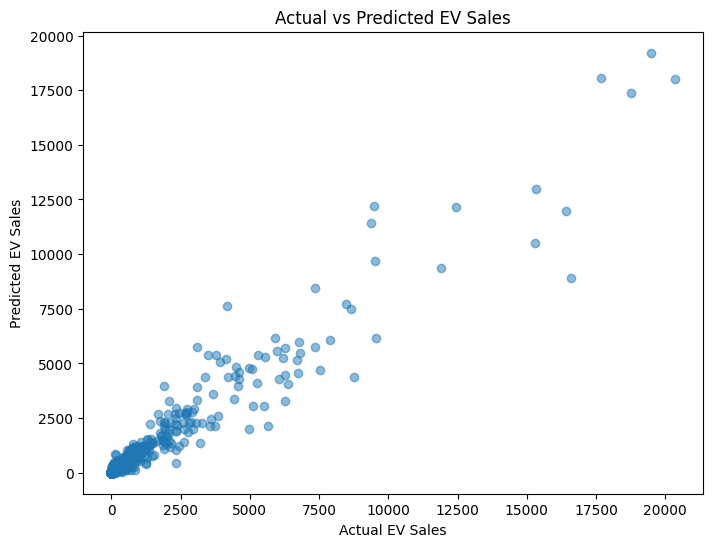

In [23]:
#  Split Data for Model Training
X = df.drop(columns=['EV_Sales_Quantity'])
y = df['EV_Sales_Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"🚀 Root Mean Squared Error (RMSE): {rmse}")

#  Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("Actual vs Predicted EV Sales")
plt.show()
